# Caffeine Content of Drinks. EDA for beginners

In [149]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [150]:
data = pd.read_csv('C:\Data\EDA_exercises\caffeine.csv')
data.head(3)

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
2,Hell Energy Coffee,250.191810,150,100,Coffee


## The beginning. 
Understanding the dataset, its columns and information.

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   drink          610 non-null    object 
 1   Volume (ml)    610 non-null    float64
 2   Calories       610 non-null    int64  
 3   Caffeine (mg)  610 non-null    int64  
 4   type           610 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 24.0+ KB


In [152]:
data.shape

(610, 5)

### Dataset health

In [153]:
# let's check the duplicated
data.duplicated().sum()

0

In [154]:
# let's check the null
data.isnull().sum()

drink            0
Volume (ml)      0
Calories         0
Caffeine (mg)    0
type             0
dtype: int64

A beautiful dataset.

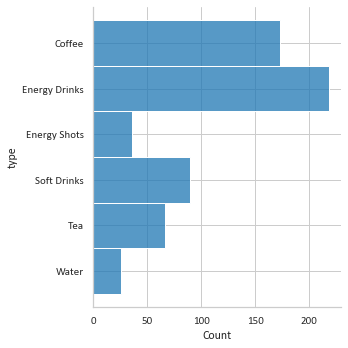

In [155]:
# Let's understand the types of drinks
sns.set(style='whitegrid', palette='tab10', font='calibri', font_scale=1)
sns.displot(data=data, y="type")
# plt.xticks(rotation=90)


In [156]:
# Let's normalise the values
data_normalised = data.loc[:, ['drink','Calories', 'Caffeine (mg)', 'type']]
data_normalised['Calories'] = data['Calories']*300/data['Volume (ml)']
data_normalised['Caffeine (mg)'] = data['Caffeine (mg)']*300/data['Volume (ml)']

data_normalised


,drink,Calories,Caffeine (mg),type
0,Costa Coffee,0.000000,323.354211,Coffee
1,Coffee Friend Brewed Coffee,0.000000,173.866603,Coffee
2,Hell Energy Coffee,179.862003,119.908002,Coffee
3,Killer Coffee (AU),0.000000,515.604408,Coffee
4,Nescafe Gold,0.000000,79.139281,Coffee
...,...,...,...,...
605,Pep Talk Sparkling Water,0.000000,46.494328,Water
606,Polar Seltzer Water,0.000000,0.000000,Water
607,Yerbae Sparkling Water,0.000000,84.535141,Water
608,Tonic Water,111.586386,0.000000,Water


In [170]:
data_normalised = data_normalised.sort_values('Caffeine (mg)',ascending=False)

In [192]:
fig = px.bar(data_normalised[0:10], y='drink', x='Caffeine (mg)',title="Top 10 most caffeinated drinks ", text_auto='.2s', opacity=0.6, )
fig.show()


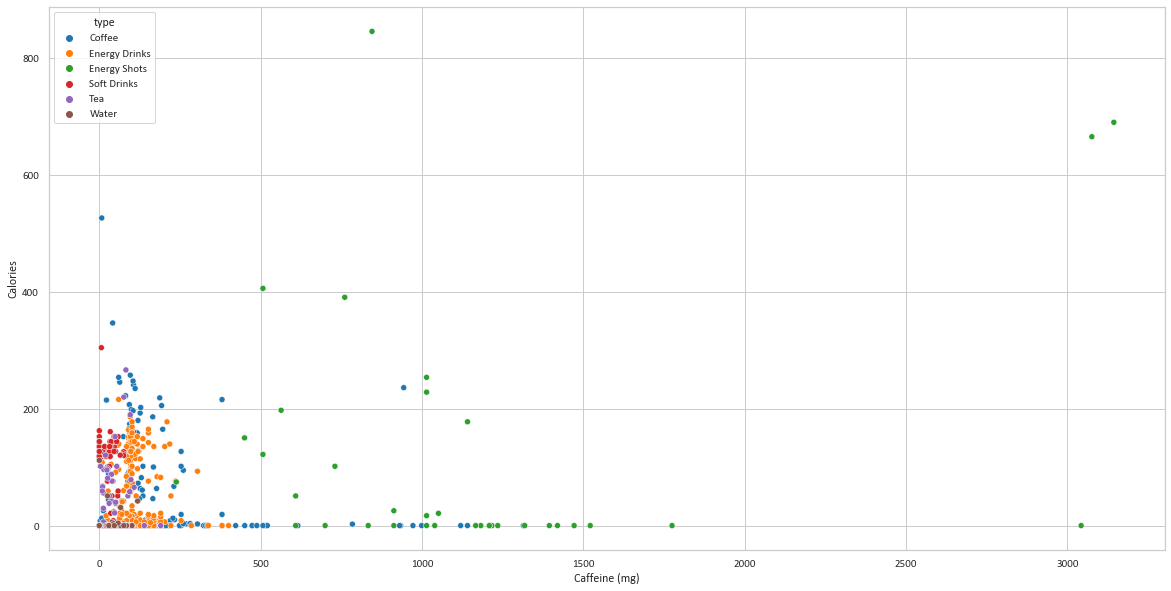

In [ ]:
# Is there a link between Calories and Caffeine?
plt.figure(figsize=(20,10))
sns.scatterplot(data=data_normalised, x="Caffeine (mg)", y="Calories", hue="type")
plt.show()

In [ ]:
data_normalised.corr()

,Calories,Caffeine (mg)
Calories,1.000000,0.143286
Caffeine (mg),0.143286,1.000000


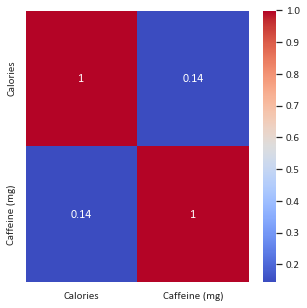

In [ ]:
sns.heatmap(data_normalised.corr(), annot= True, cmap='coolwarm');

Nop... slightly negative correlation 

In [ ]:
# For diet lovers
data_diet = data[data.Calories == 0]
data_diet

,drink,Volume (ml),Calories,Caffeine (mg),type
0,Costa Coffee,256.993715,0,277,Coffee
1,Coffee Friend Brewed Coffee,250.191810,0,145,Coffee
3,Killer Coffee (AU),250.191810,0,430,Coffee
4,Nescafe Gold,250.191810,0,66,Coffee
9,TrueStart Performance Coffee,150.824850,0,95,Coffee
...,...,...,...,...,...
604,Limitless Sparkling Water,354.882000,0,35,Water
605,Pep Talk Sparkling Water,354.882000,0,55,Water
606,Polar Seltzer Water,354.882000,0,0,Water
607,Yerbae Sparkling Water,354.882000,0,100,Water


In [ ]:
print(f'Percentage of calorie-free beverages: {round(data_diet.size * 100 / data.size,2)}%')

Percentage of calorie-free beverages: 32.79%


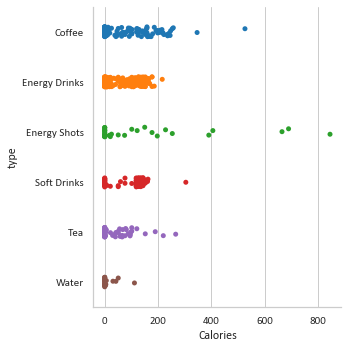

In [ ]:
sns.catplot(y='type',x='Calories',data=data_normalised);
# plt.xticks(rotation=90)


woow water you aren't light!

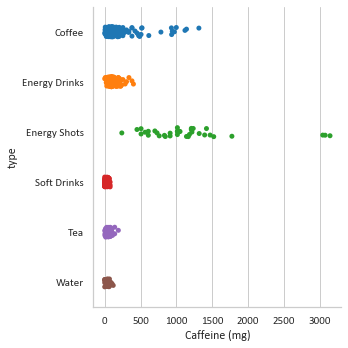

In [ ]:
sns.catplot(y='type',x='Caffeine (mg)',data=data_normalised);

If you need caffeine or calories, take an energy drink. =D

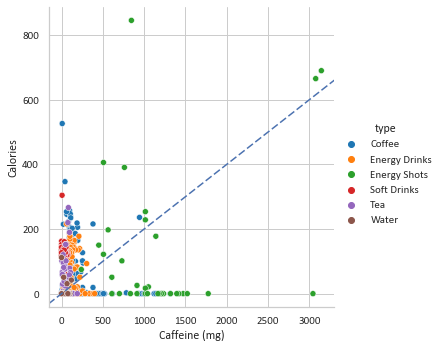

In [ ]:
g = sns.relplot(data=data_normalised, y='Calories',x='Caffeine (mg)', hue='type');
g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))

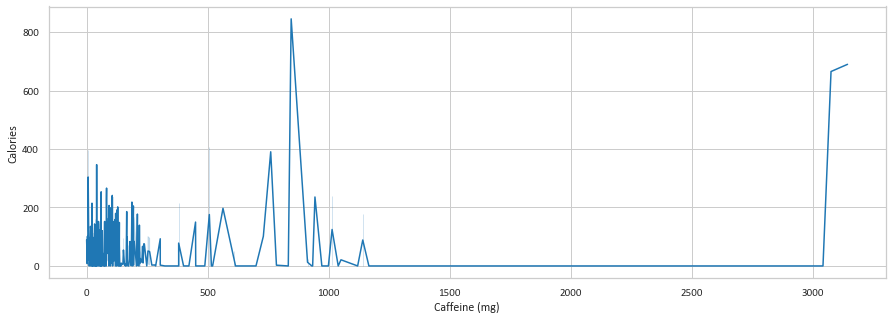

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data_normalised, y='Calories',x='Caffeine (mg)')
plt.show()

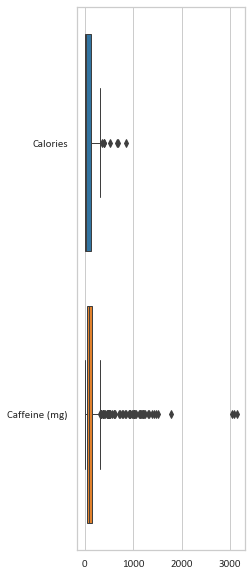

In [ ]:
plt.figure(figsize=(3,10))
sns.boxplot(data=data_normalised, linewidth=1, orient="h")
plt.show()

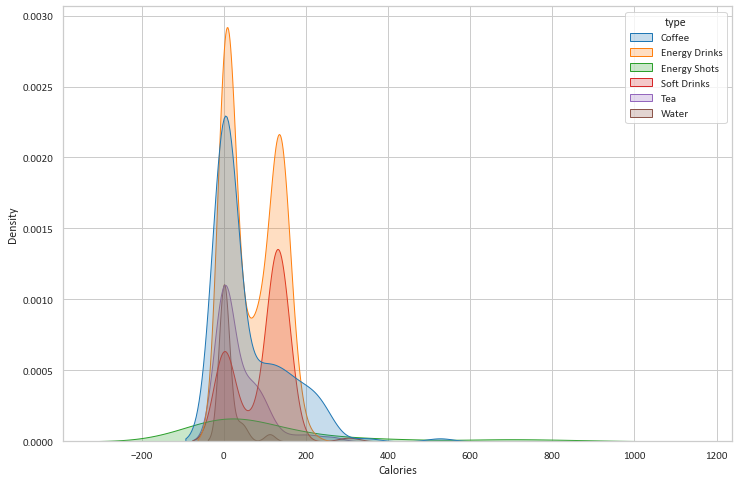

In [ ]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=data_normalised, x='Calories', shade=True, hue='type');
mediana = np.percentile(data['Calories'], 50) 
plt.show()